# Project 1
#### From Stephen Klosterman's book DATA SCIENCE PROJECTS WITH PYTHON (2019)

In [1]:
# Loading the sys package to check python's version

import sys

print('The Python version is {}.\n'.format(sys.version))

## Markdown

__bold__ with "__"

*italics* with '*'

`code` with ticks ( ` )

## 2. Loading CSV data from an excel

In [2]:
import pandas as pd

df = pd.read_excel("Data/default_of_credit_card_clients__courseware_version_1_21_19.xls")

## 3. Verifying Basic Data Integrity

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df['ID'].nunique()

29687

In [6]:
df['ID'].unique()

array(['798fc410-45c1', '8a8c8f3b-8eb4', '85698822-43f5', ...,
       '95cdd3e7-4f24', '00d03f02-04cd', '15d69f9f-5ad3'], dtype=object)

In [7]:
df.shape

(30000, 25)

<b>Less unique IDs than the number of rows, which means there are duplicates.</b>

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head()

3327c2a8-3402    2
0170086d-7472    2
37a1d9c2-701c    2
d5905747-8aef    2
cd944abe-cef9    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

### Boolean Masks

In [10]:
import numpy as np

np.random.seed(seed=24)
random_integers = np.random.randint(low=1, high=5, size=100)

In [11]:
len(random_integers)

100

In [12]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [13]:
is_equal_to_3 = (random_integers == 3)

In [14]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [15]:
sum(is_equal_to_3)

22

In [16]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## 4. Continuing Verification of Data Integrity

#### This step is self-explanatory: we want to focus on all the IDs which are repeated, and so we create a mask that selects for them.

In [17]:
dupe_mask = (id_counts == 2)

In [18]:
dupe_mask[0:5]

3327c2a8-3402    True
0170086d-7472    True
37a1d9c2-701c    True
d5905747-8aef    True
cd944abe-cef9    True
Name: ID, dtype: bool

In [19]:
id_counts.index[0:5]

Index(['3327c2a8-3402', '0170086d-7472', '37a1d9c2-701c', 'd5905747-8aef',
       'cd944abe-cef9'],
      dtype='object')

In [20]:
dupe_ids = id_counts.index[dupe_mask]

In [21]:
# from array to list
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [22]:
dupe_ids[0:5]

['3327c2a8-3402',
 '0170086d-7472',
 '37a1d9c2-701c',
 'd5905747-8aef',
 'cd944abe-cef9']

#### Find all rows in df that contain the first three dupe (repeated) IDs.

In [23]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
13038,37a1d9c2-701c,190000,1,2,2,33,Not available,0,0,0,...,155584,157988,154366,7063,8004,5500,7000,6000,5000,0
13138,37a1d9c2-701c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19979,3327c2a8-3402,150000,2,2,1,45,0,0,0,0,...,25960,12889,12890,6007,1566,1441,259,12891,12497,0
20079,3327c2a8-3402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21872,0170086d-7472,100000,2,1,1,25,0,0,-1,0,...,52079,40183,35796,28,103350,1722,1100,1300,2000,0
21972,0170086d-7472,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### These are just some duplicates. Also, it looks like every duplicate row has one row filled with data, and another row filled with only zeroes. Is this the case for every duplicate ID? Let's check.

In [24]:
df_zero_mask = (df == 0)
type(df_zero_mask)

pandas.core.frame.DataFrame

#### Select all rows, from the second column on. Note that the all() function is used to check whether all elements are True

In [94]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
type(feature_zero_mask)

pandas.core.series.Series

#### Let's see how many zero rows there are.

In [26]:
sum(feature_zero_mask)

315

#### Let's remove all the rows with all zero features and response, and see if that gets rid of the duplicate IDs.

In [27]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy()
type(df_clean_1)

pandas.core.frame.DataFrame

In [28]:
df_clean_1.shape

(29685, 25)

In [29]:
df_clean_1['ID'].nunique()

29685

## 5. Exploring and Cleaning the Data

In [80]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

#### Observe that PAY_1 has a data type of 'object' instead of int64 as it should.

In [32]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

#### by using value_counts we can see why the column/feature has been assigned the type 'object'. A

In [33]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

#### We make a mask that includes all of the values that are not 'Not available', all of which are integers.

In [34]:
valid_pay_1_mask = (df_clean_1['PAY_1'] != 'Not available')

In [36]:
sum(valid_pay_1_mask)

26664

#### df_clean_2: a copy of df_clean_1 in which we put only the rows why have available data.

In [37]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [38]:
df_clean_2.shape

(26664, 25)

In [39]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

#### Convert the dtype of the column/feature 'PAY_1' from object to int64

In [40]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [41]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## 6. Exploring the Credit Limit and Demographic Features

In [42]:
import matplotlib.pyplot as plt

# to render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400 # high reslution figures

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002801F724888>,
      dtype=object)

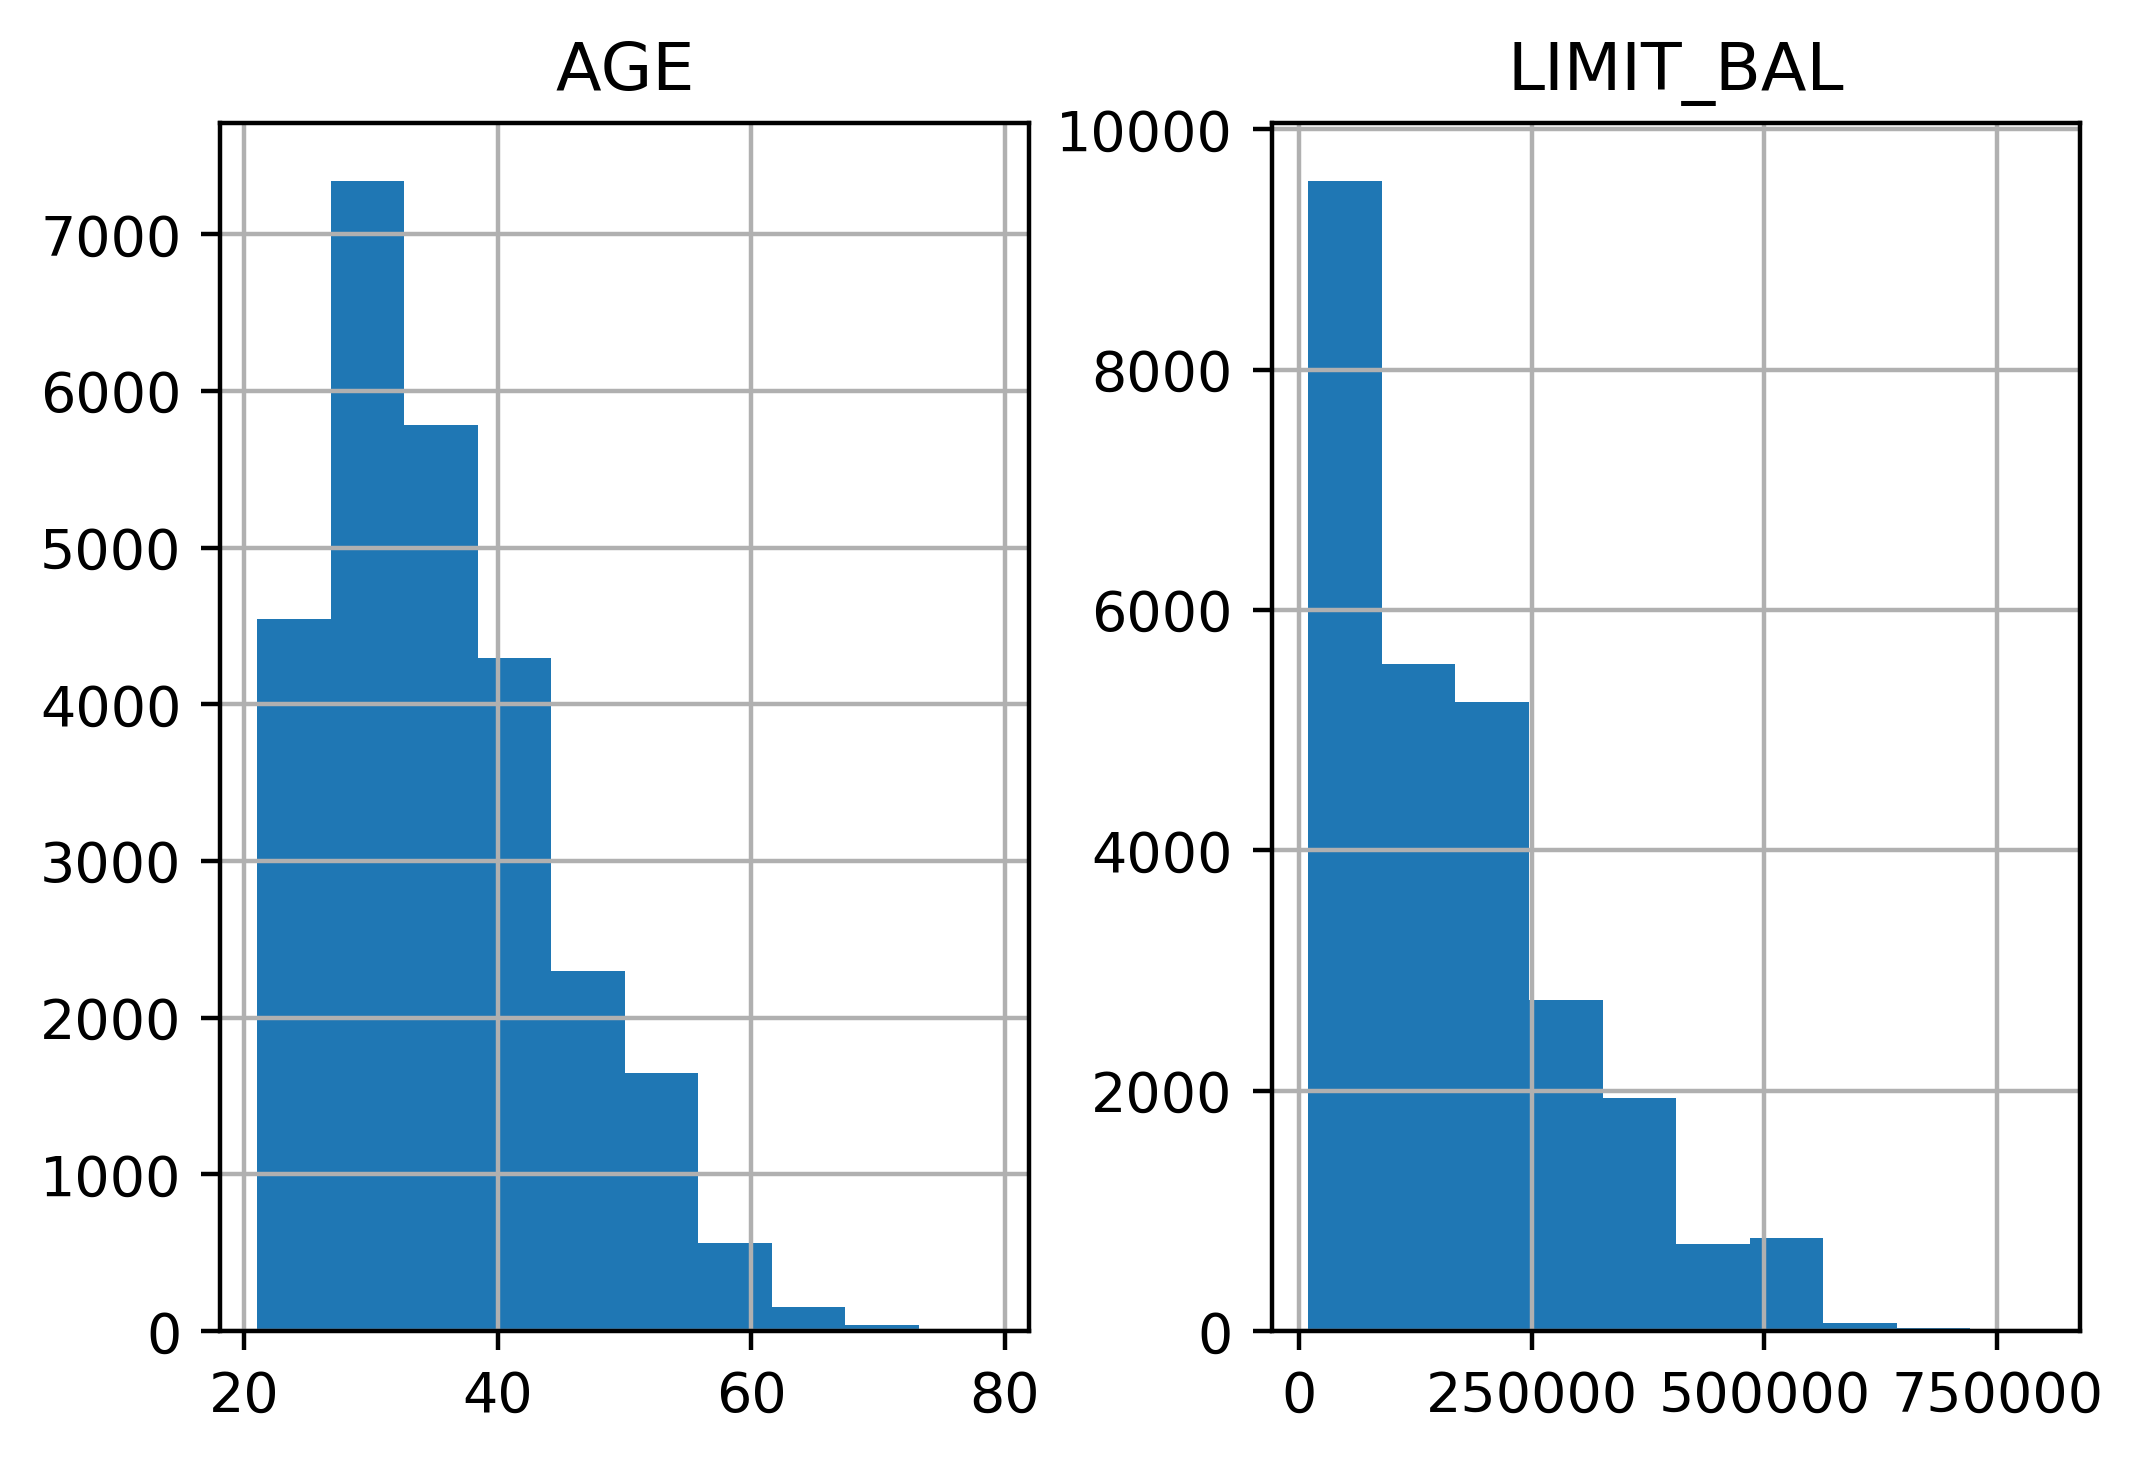

In [43]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [44]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


### Cleaning the EDUCATION column/feature

In [45]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

#### Education (1 = graduate school, 2 = university, 3 = high school, 4 = other)

In [46]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

### Examine and clean MARRIAGE as well

In [47]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

#### Marriage (1= married, 2 = single, 3 = other)

In [48]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Deep dive: categorical features

#### "Roughly speaking, for a binary classification model, you can look at different levels of a categorical feature in terms of the average values of the response variable, which represent the rates of the positive class (variable=1) for each level. This can give you an idea of whether an ordinal encoding will work well with a linear model."

In [53]:
df2_ed = df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'})
df2_ed

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


#### When this is plotted, we observe that trying to fit a straight line through this data would not provide a useful model.

Text(0.5, 0, 'Education level: ordinal encoding')

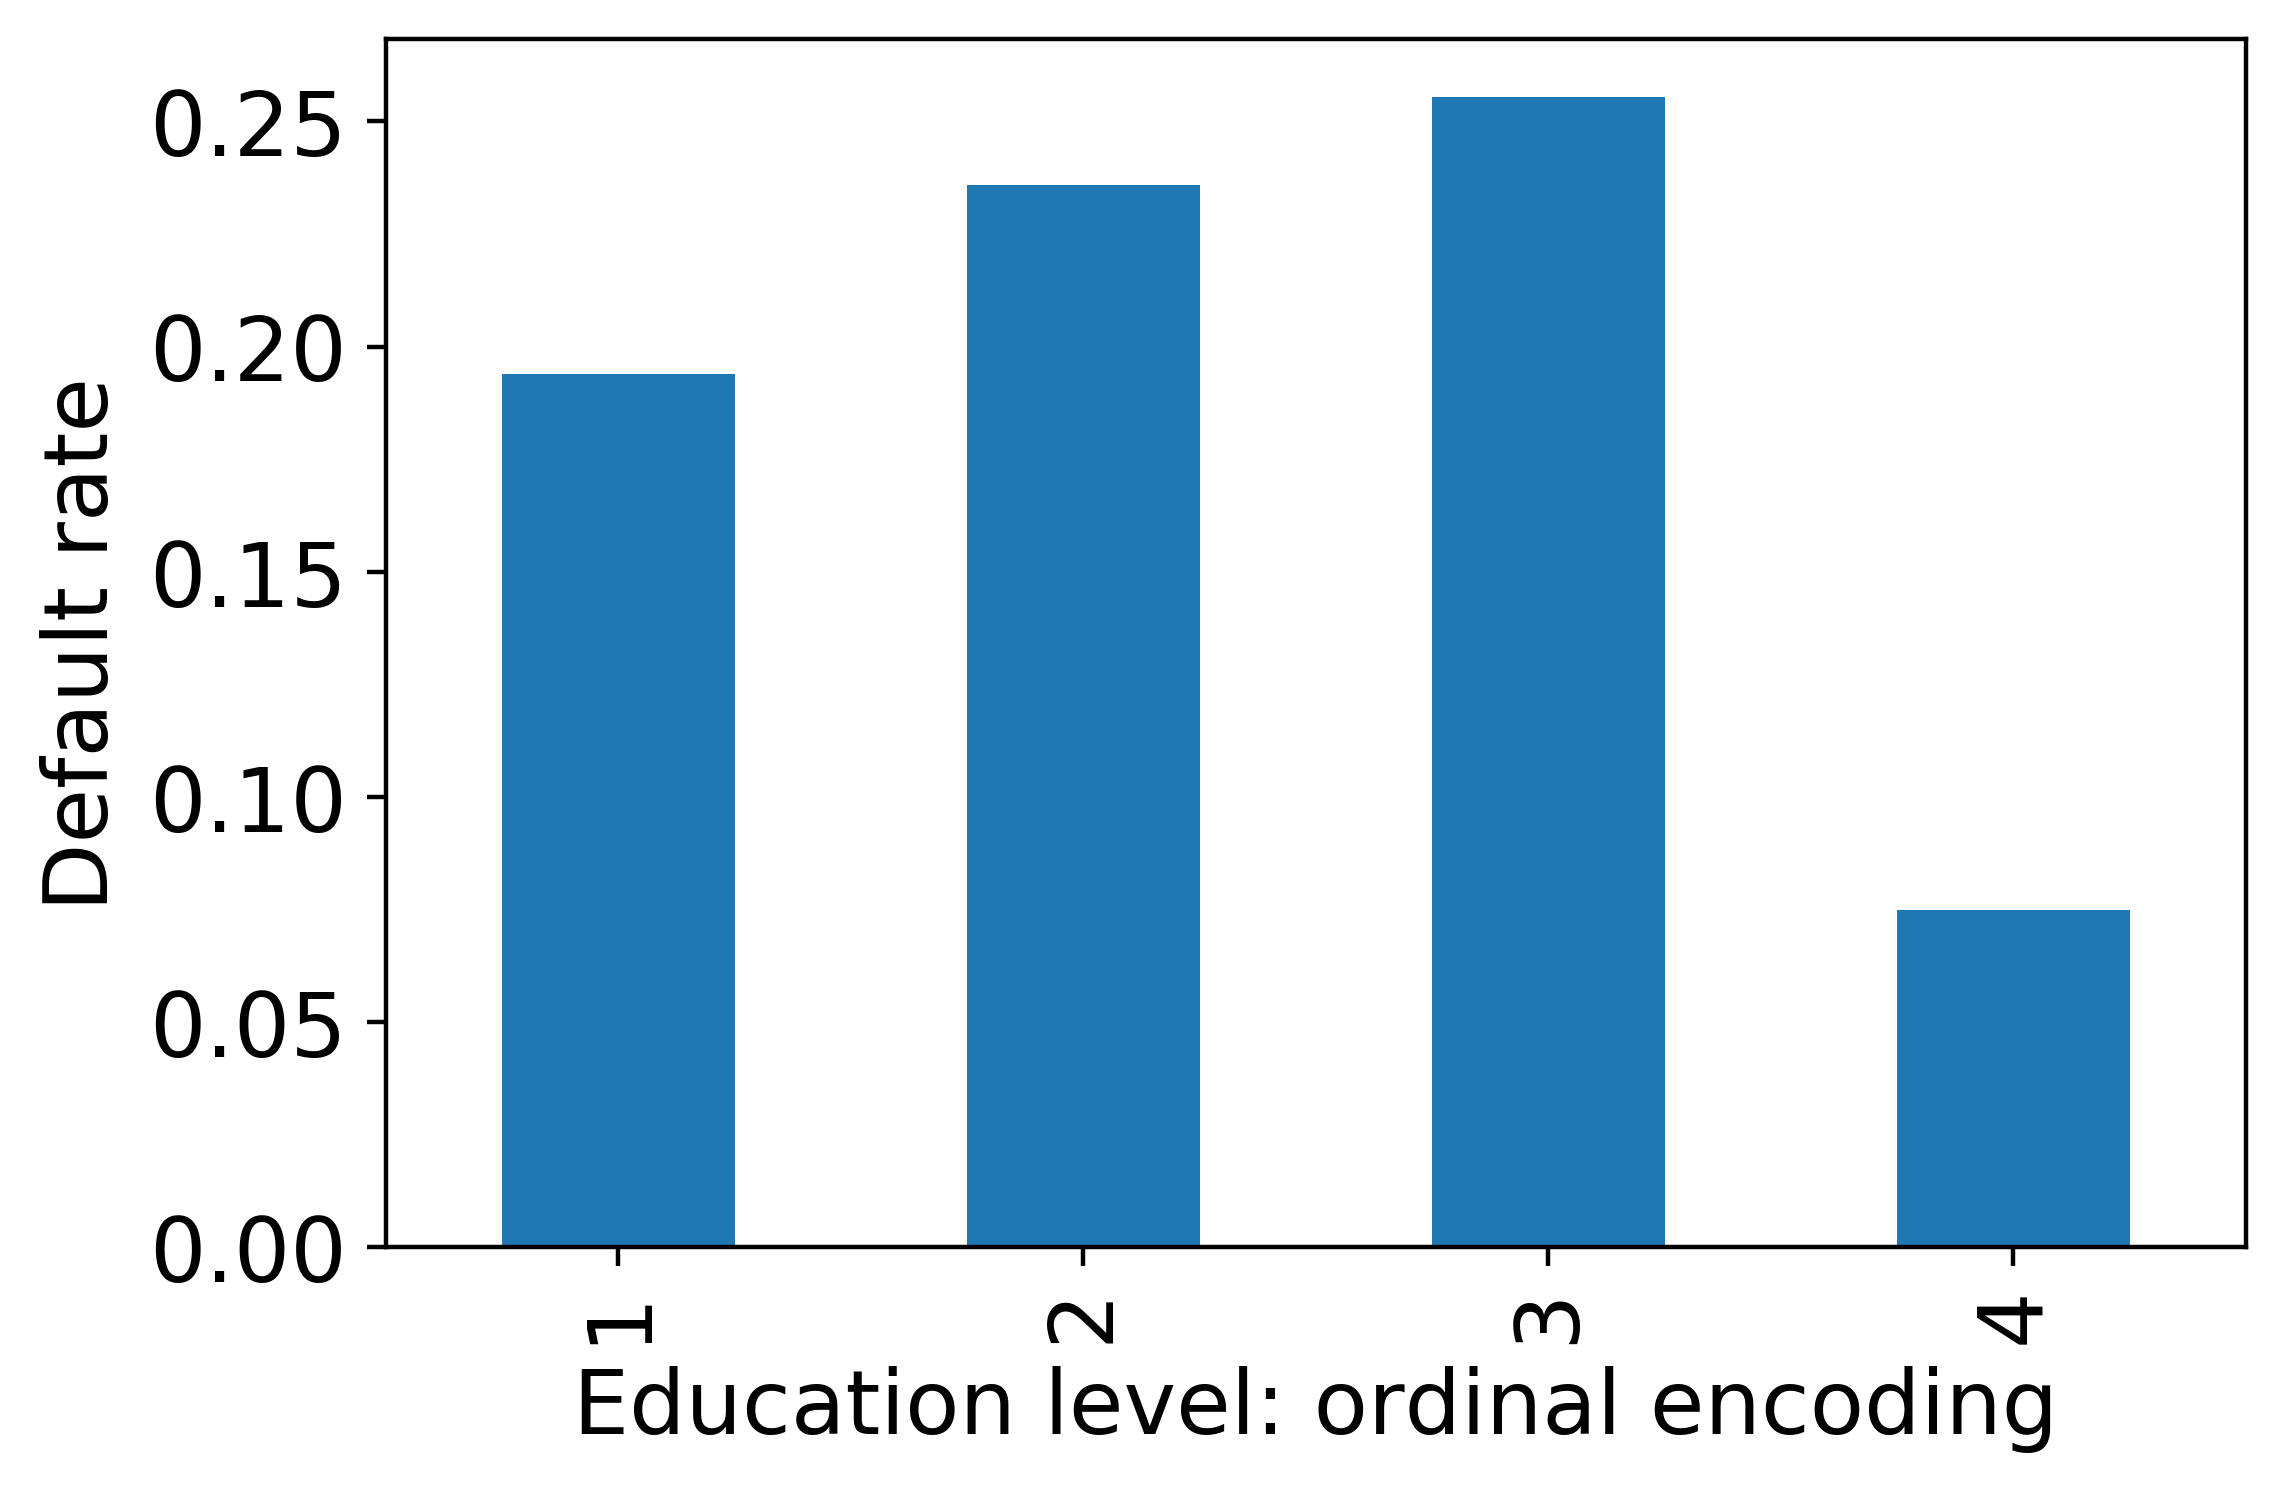

In [54]:
df2_ed.plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

## 7. Implementing One-Hot Encoiding for a Categorical Feature

#### A way of simplyfying the classification, we can turn from an ordinal encoding to a binary encoding.

In [55]:
df_clean_2['EDUCATION'].head()

0    2
1    2
2    2
3    2
4    2
Name: EDUCATION, dtype: int64

In [56]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


#### Education (1 = graduate school; 2 = university; 3 = high school; 4 = other)

In [57]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "other"
}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


#### One-Hot Encoding (OHE) transforms a categorical feature and turns it into a numerical one. It takes the different possible categorical values and creates columns/features out of them. Now, each row is true for only one of the categories, and zero for the others. Note that Python assumes categories in text form, while some R packages or Spark assume ordinal values in numerical form.

In [58]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,other,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


#### Concatenate the one-hot encoded DataFrame to the original DataFrame

In [96]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'other']].head(10)

,EDUCATION_CAT,graduate school,high school,university,other
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


#### Save the DataFrame with cleaned data and added OHE columns.

In [97]:
df_with_ohe.to_csv('Data/chapter_1_cleaned_data.csv')

## 8. Exploring the Financial History Features in the Dataset

In [59]:
df = pd.read_csv('Data/Chapter_1_cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [60]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [61]:
df.shape

(26664, 31)

In [62]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


#### Negative values in this categorical scheme are not explained at this point. However, the positive values correspond to monthly delays in payment, while the negative ones have different meaning.

In [63]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

####

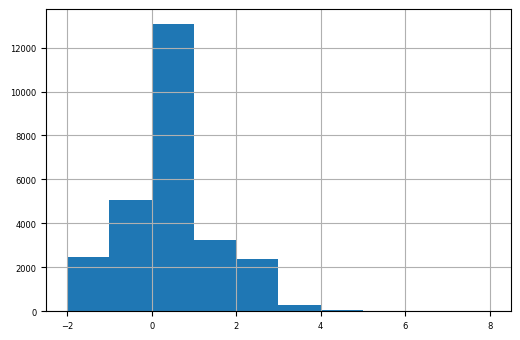

In [101]:
mpl.rcParams['figure.dpi'] = 100 # we don't need a huge picture on this notebook.
mpl.rcParams['font.size'] = 6
df[pay_feats[0]].hist()

#### The above job can be improved upon. We first fix edges of the bins to visualize PAY_1 in a histogram. We also add x- and y-axis labels for the graph to be readily understandable. "While it's tempting, and often sufficient, to just call plotting functions with the default arguments, one of your jobs as a data scientist is to create <em>accurate and representative data visualizations</em>. To do that, sometimes you need to dig into the details of plotting code.

In [102]:
pay_1_bins = np.array(range(-1, 10)) - 0.5
pay_1_bins

array([-1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5])

Text(0, 0.5, 'Number of accounts')

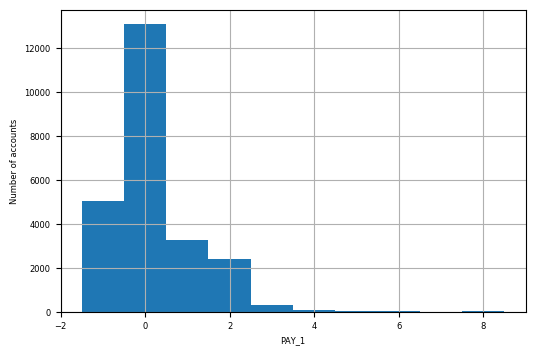

In [103]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

#### Note: PAY_1 is the repayment status in September, PAY_2 in August, PAY_3 in July, and so on... going backwards in time. A value of 1 means payment delay for 1 month, while a value of 2 means payment delay for 2 months.

In [68]:
for feat in pay_feats:
    print(df[feat].value_counts().sort_index())

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64
-2     3654
-1     5290
 0    13968
 1        3
 2     3400
 3      214
 4       69
 5       20
 6       19
 7       24
 8        3
Name: PAY_3, dtype: int64
-2     3893
-1     5070
 0    14596
 1        2
 2     2798
 3      161
 4       57
 5       30
 6        4
 7       51
 8        2
Name: PAY_4, dtype: int64
-2     4056
-1     4949
 0    15032
 2     2335
 3      151
 4       71
 5       14
 6        2
 7       53
 8        1
Name: PAY_5, dtype: int64
-2     4366
-1     5138
 0    14416
 2     2476
 3      156
 4       43
 5       10
 6       15
 7       42
 8        2
Name: PAY_6, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802005CE48>,
      dtype=object)

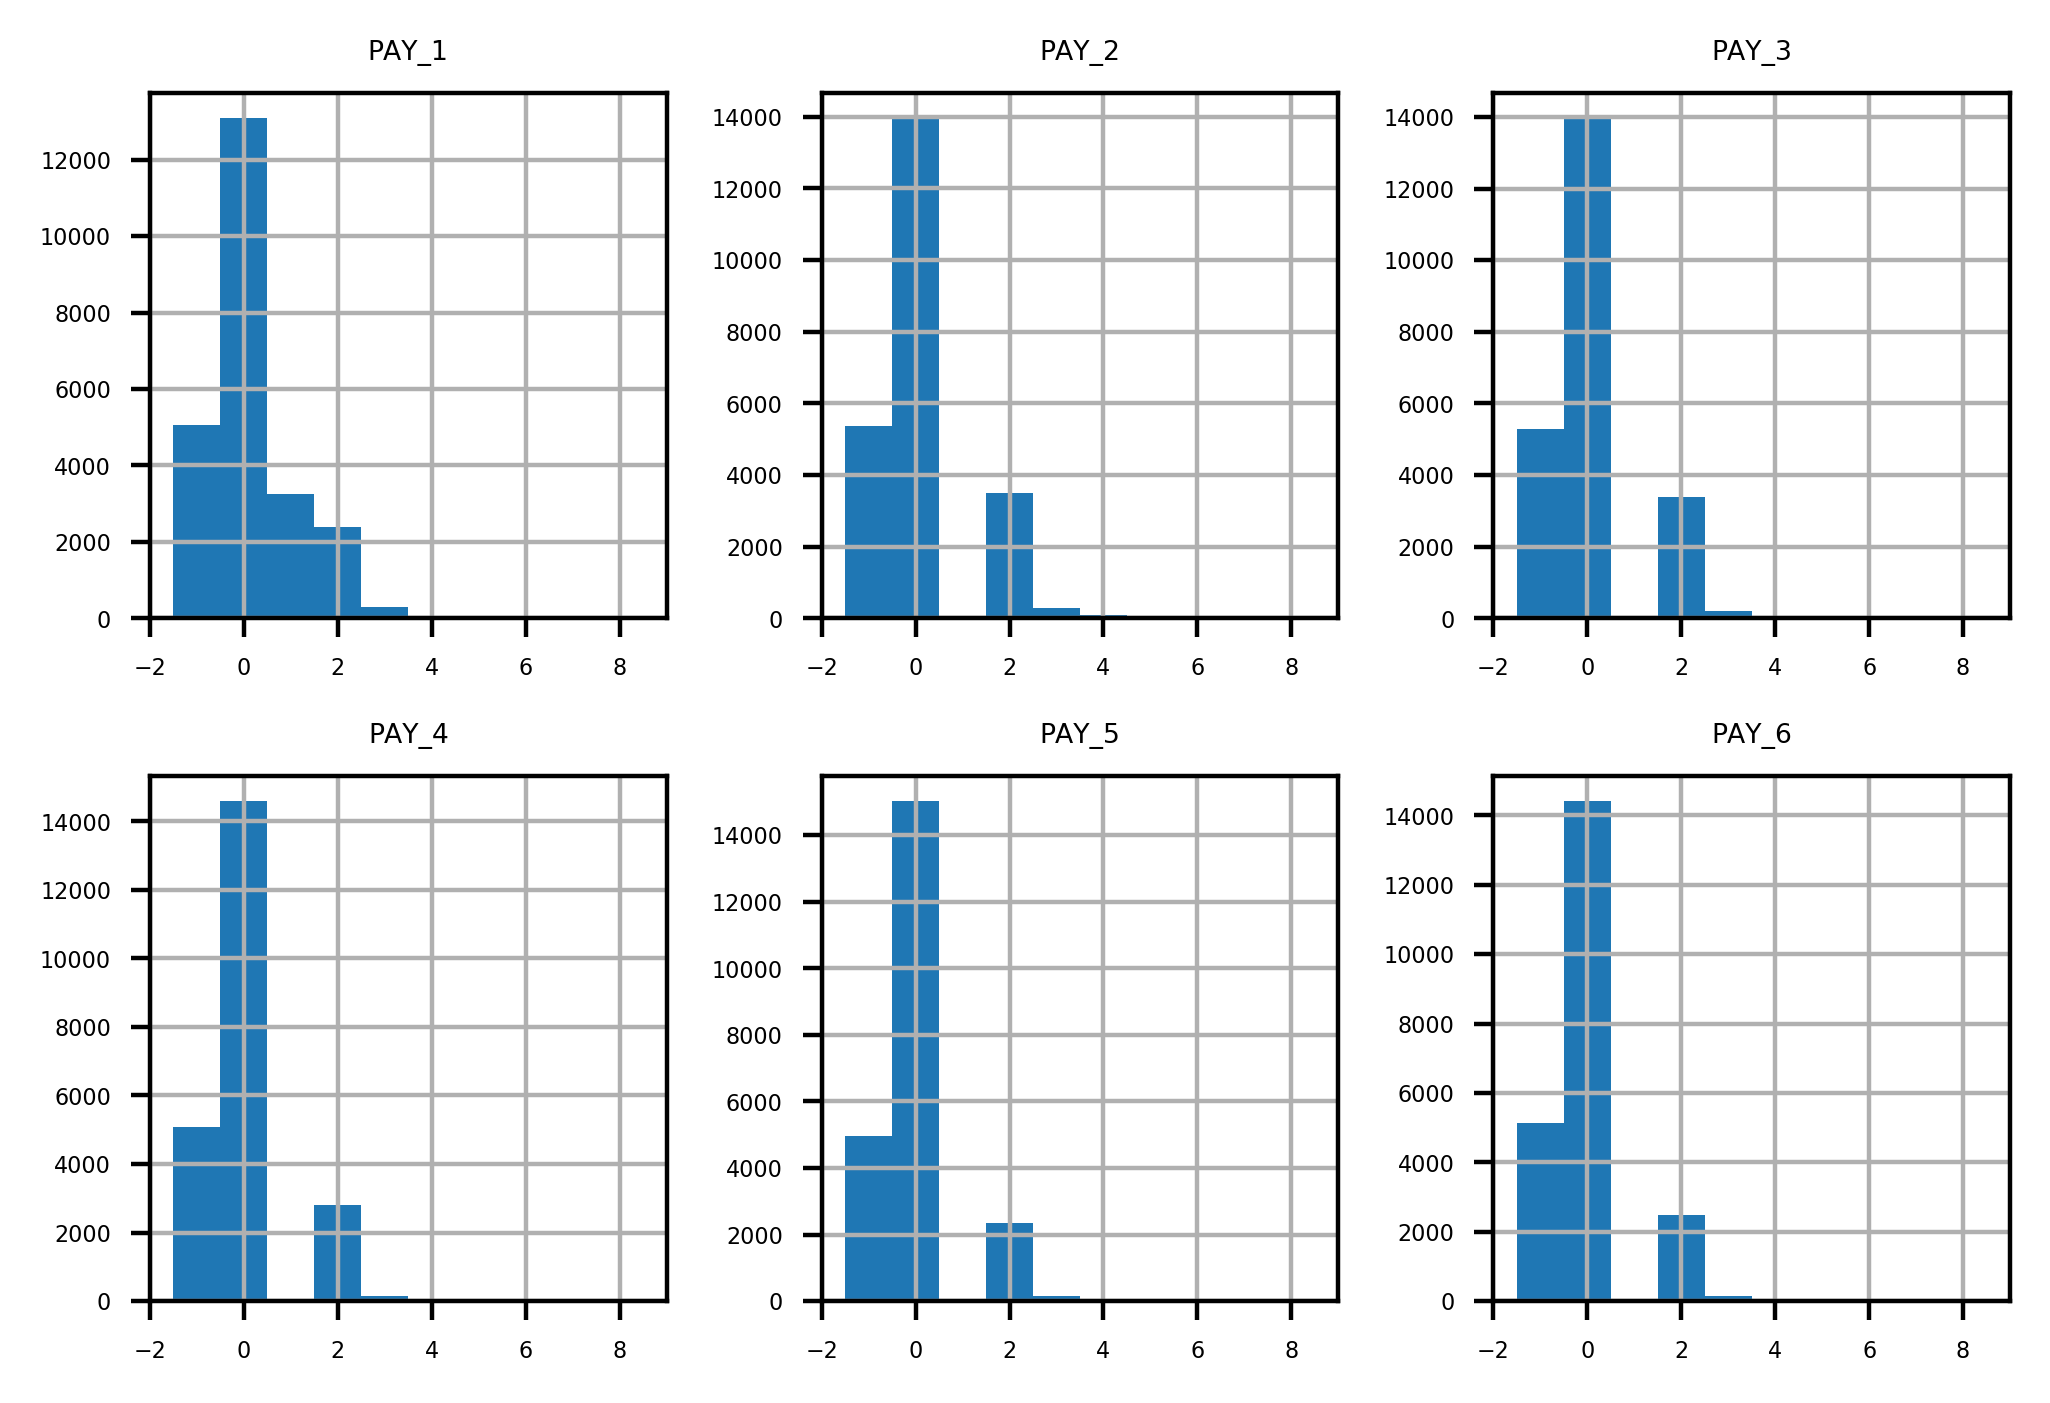

In [69]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2, 3))

#### We notice that something in the data does not make sense: in July (PAY_3), there are very few accounts that had a 1-month payment delay (0, according to the numbers). Then, in August (PAY_2), there are suddenly more than three thousand accounts with a 2-month payment delay. In our case study we are informed that this has to do with a problem with the client's system, which affected the retrieval of records EXCEPT those that are most current (PAY_1).

In [70]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


# Activity 1: Exploring Remaining Financial Features in the Dataset

In [104]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [105]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802CE255C8>,
      dtype=object)

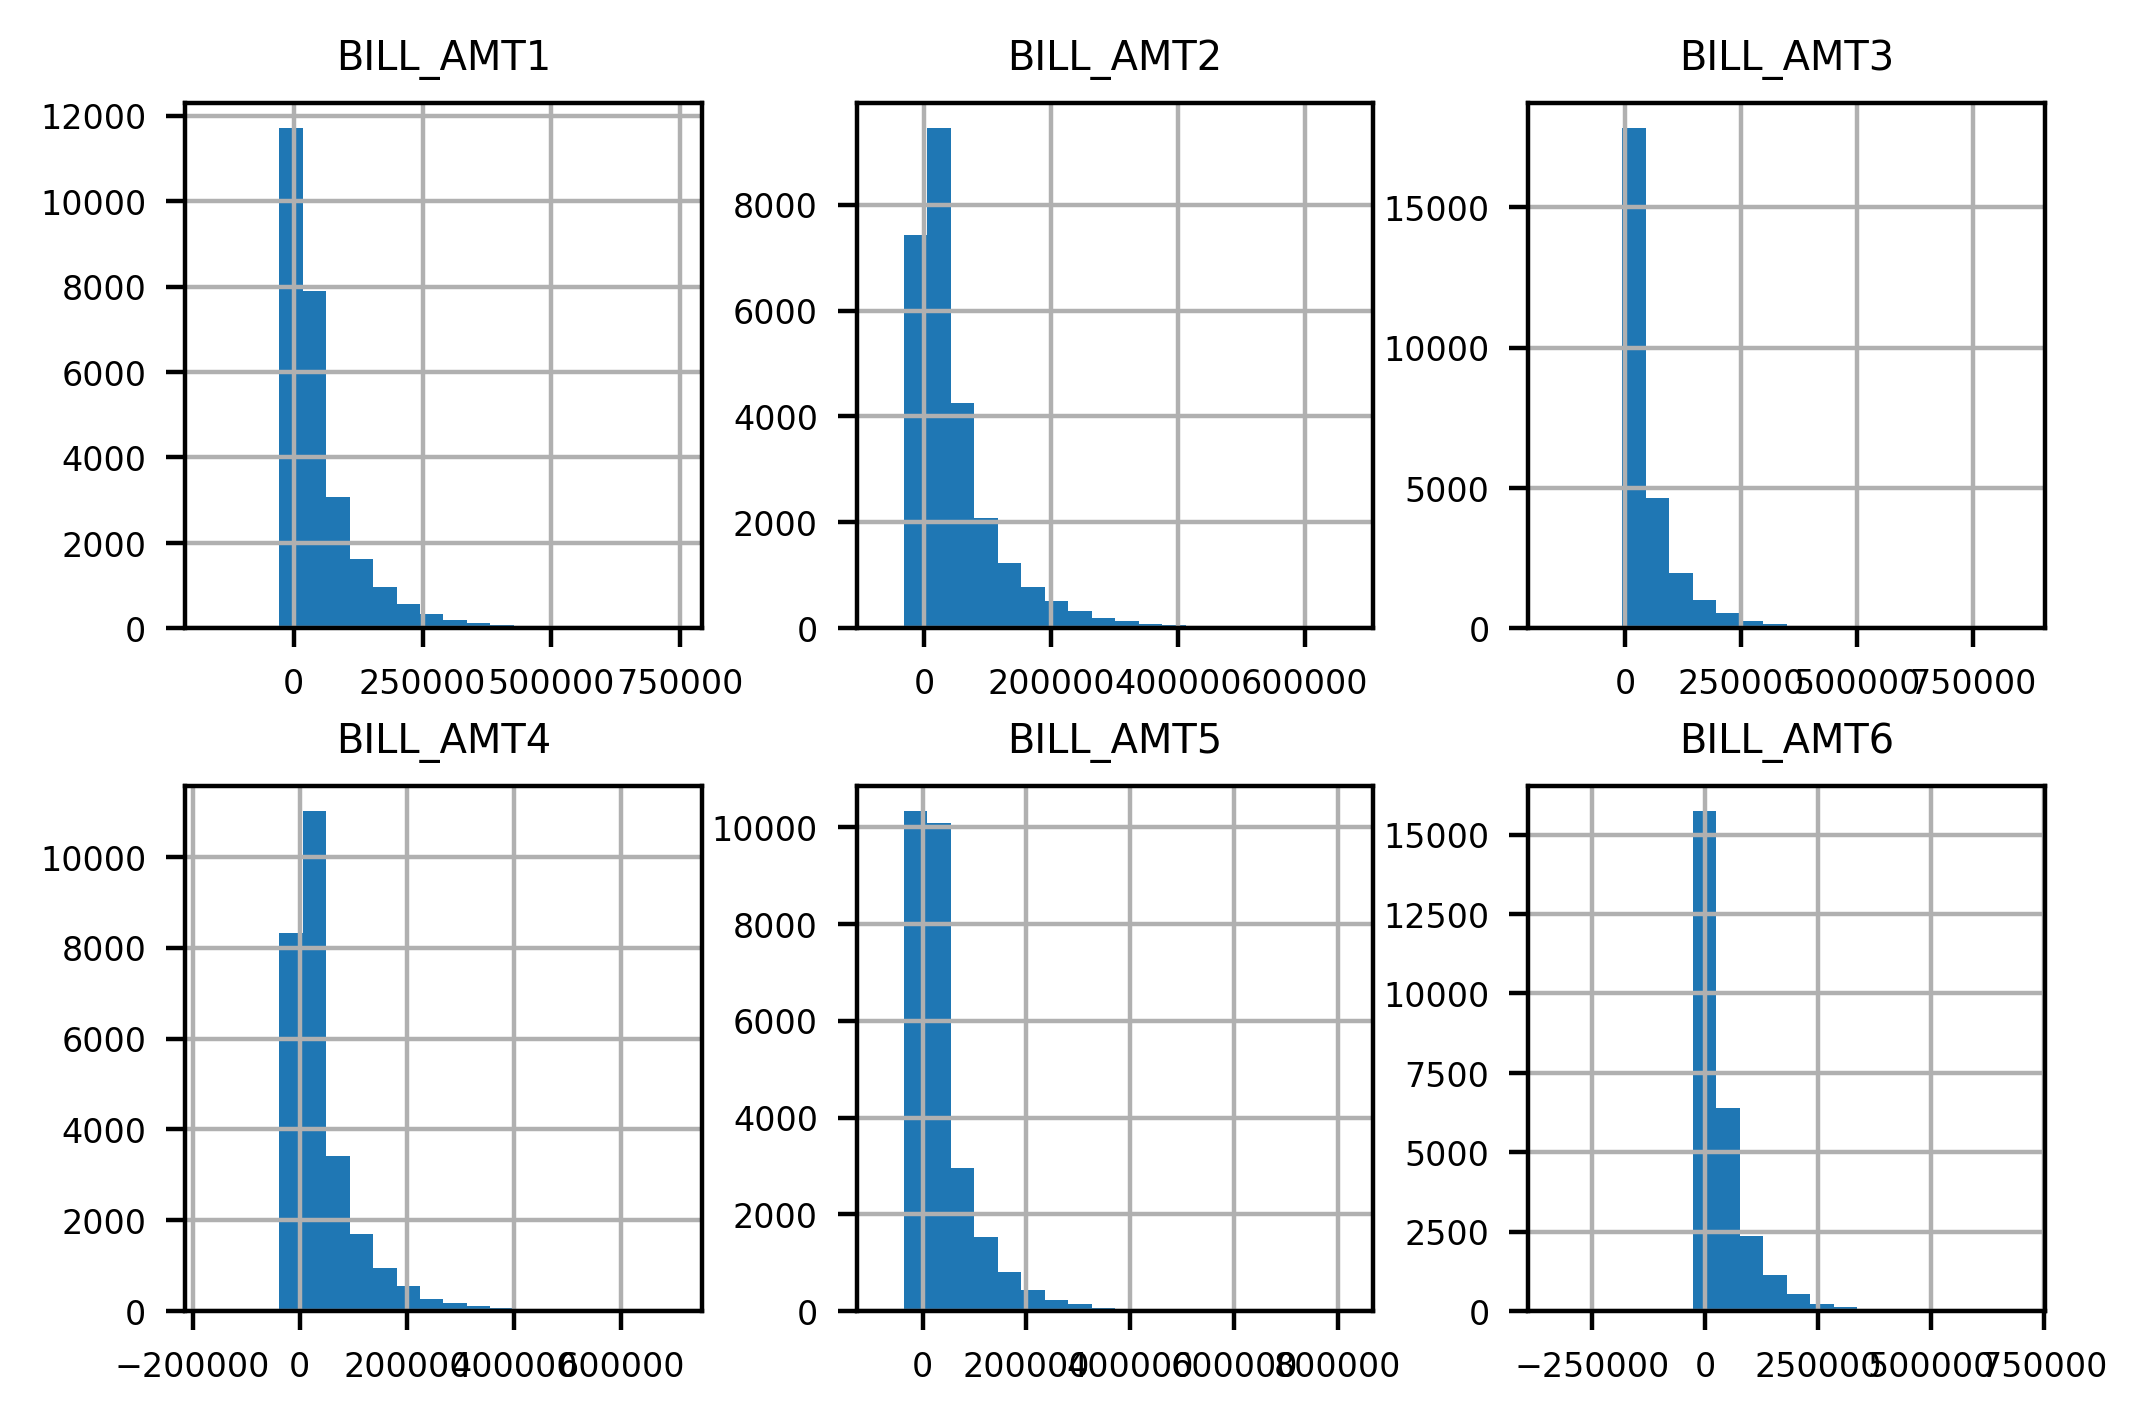

In [109]:
mpl.rcParams['figure.dpi'] = 400 # we don't need a huge picture on this notebook.
mpl.rcParams['font.size'] = 6
df[bill_feats].hist(bins=20, layout=(2,3))

In [74]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802E445C48>,
      dtype=object)

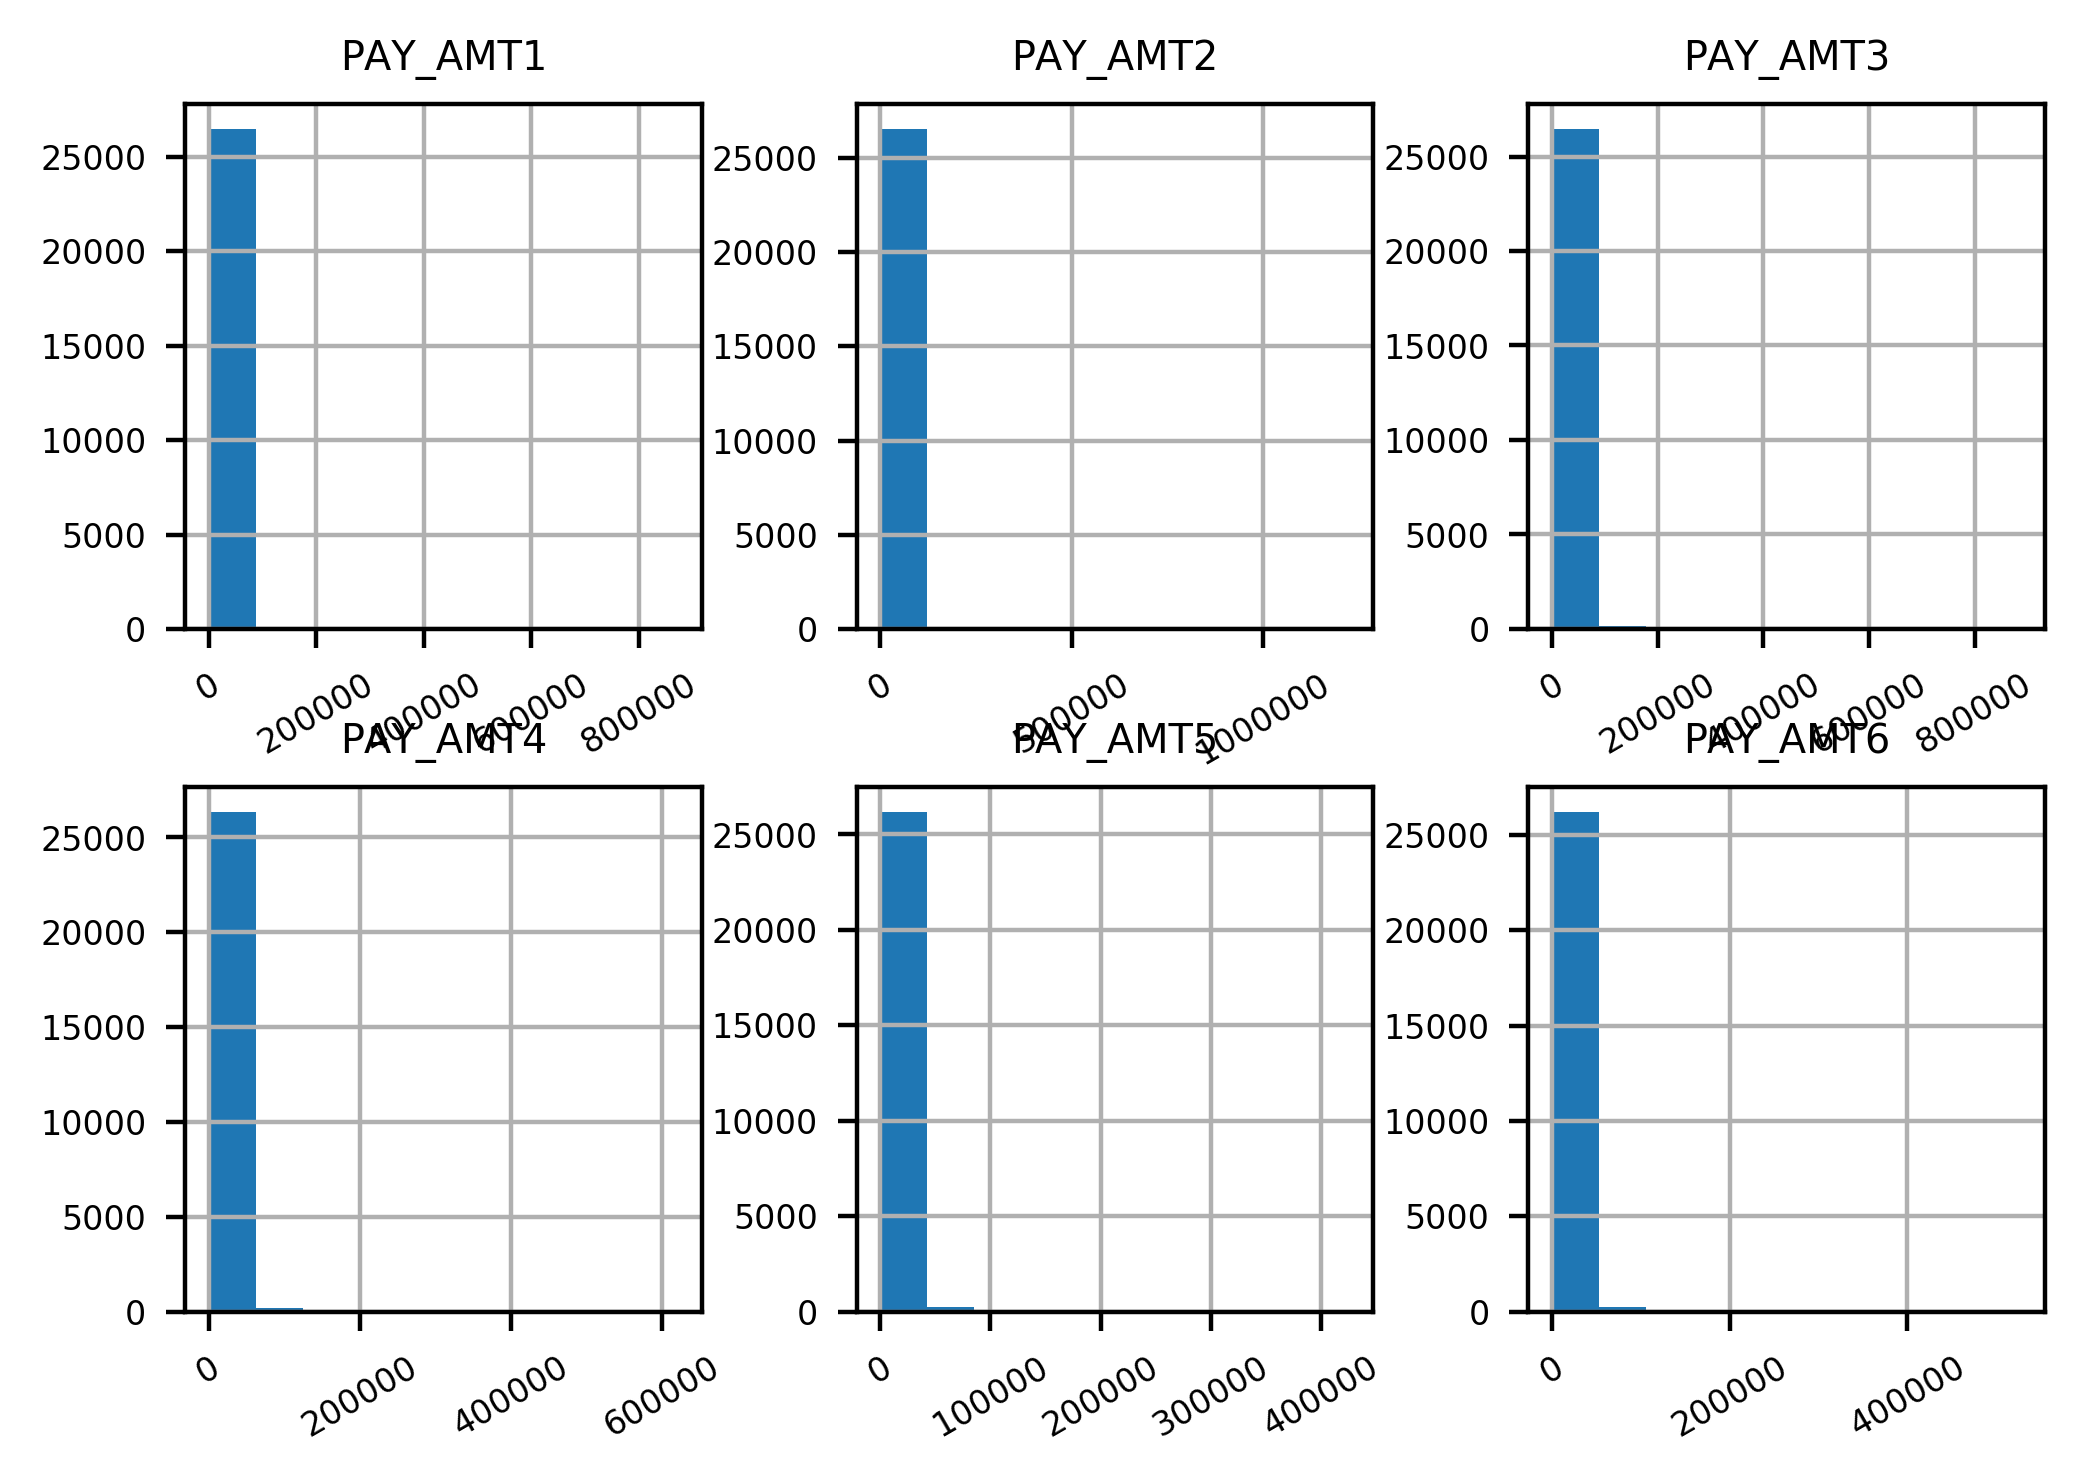

In [110]:
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 6
df[pay_amt_feats].hist(layout=(2,3), xrot=30)

#### Use a Boolean mask to see how many of the payment amount data are exactly equal to 0. We suspect that they are the majority and they are not enabling us to visualize the non-zero payments clearly.

In [76]:
pay_zero_mask = (df[pay_amt_feats] == 0)
print("`pay_zero_mask.sum()` = \n{}".format(pay_zero_mask.sum()))
pay_zero_mask.head()

`pay_zero_mask.sum()` = 
PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


#### We exclude the zero payments by using the negation of the pay_zero_mask, we then apply a logarithmic transformation. Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802E6D2B08>,
      dtype=object)

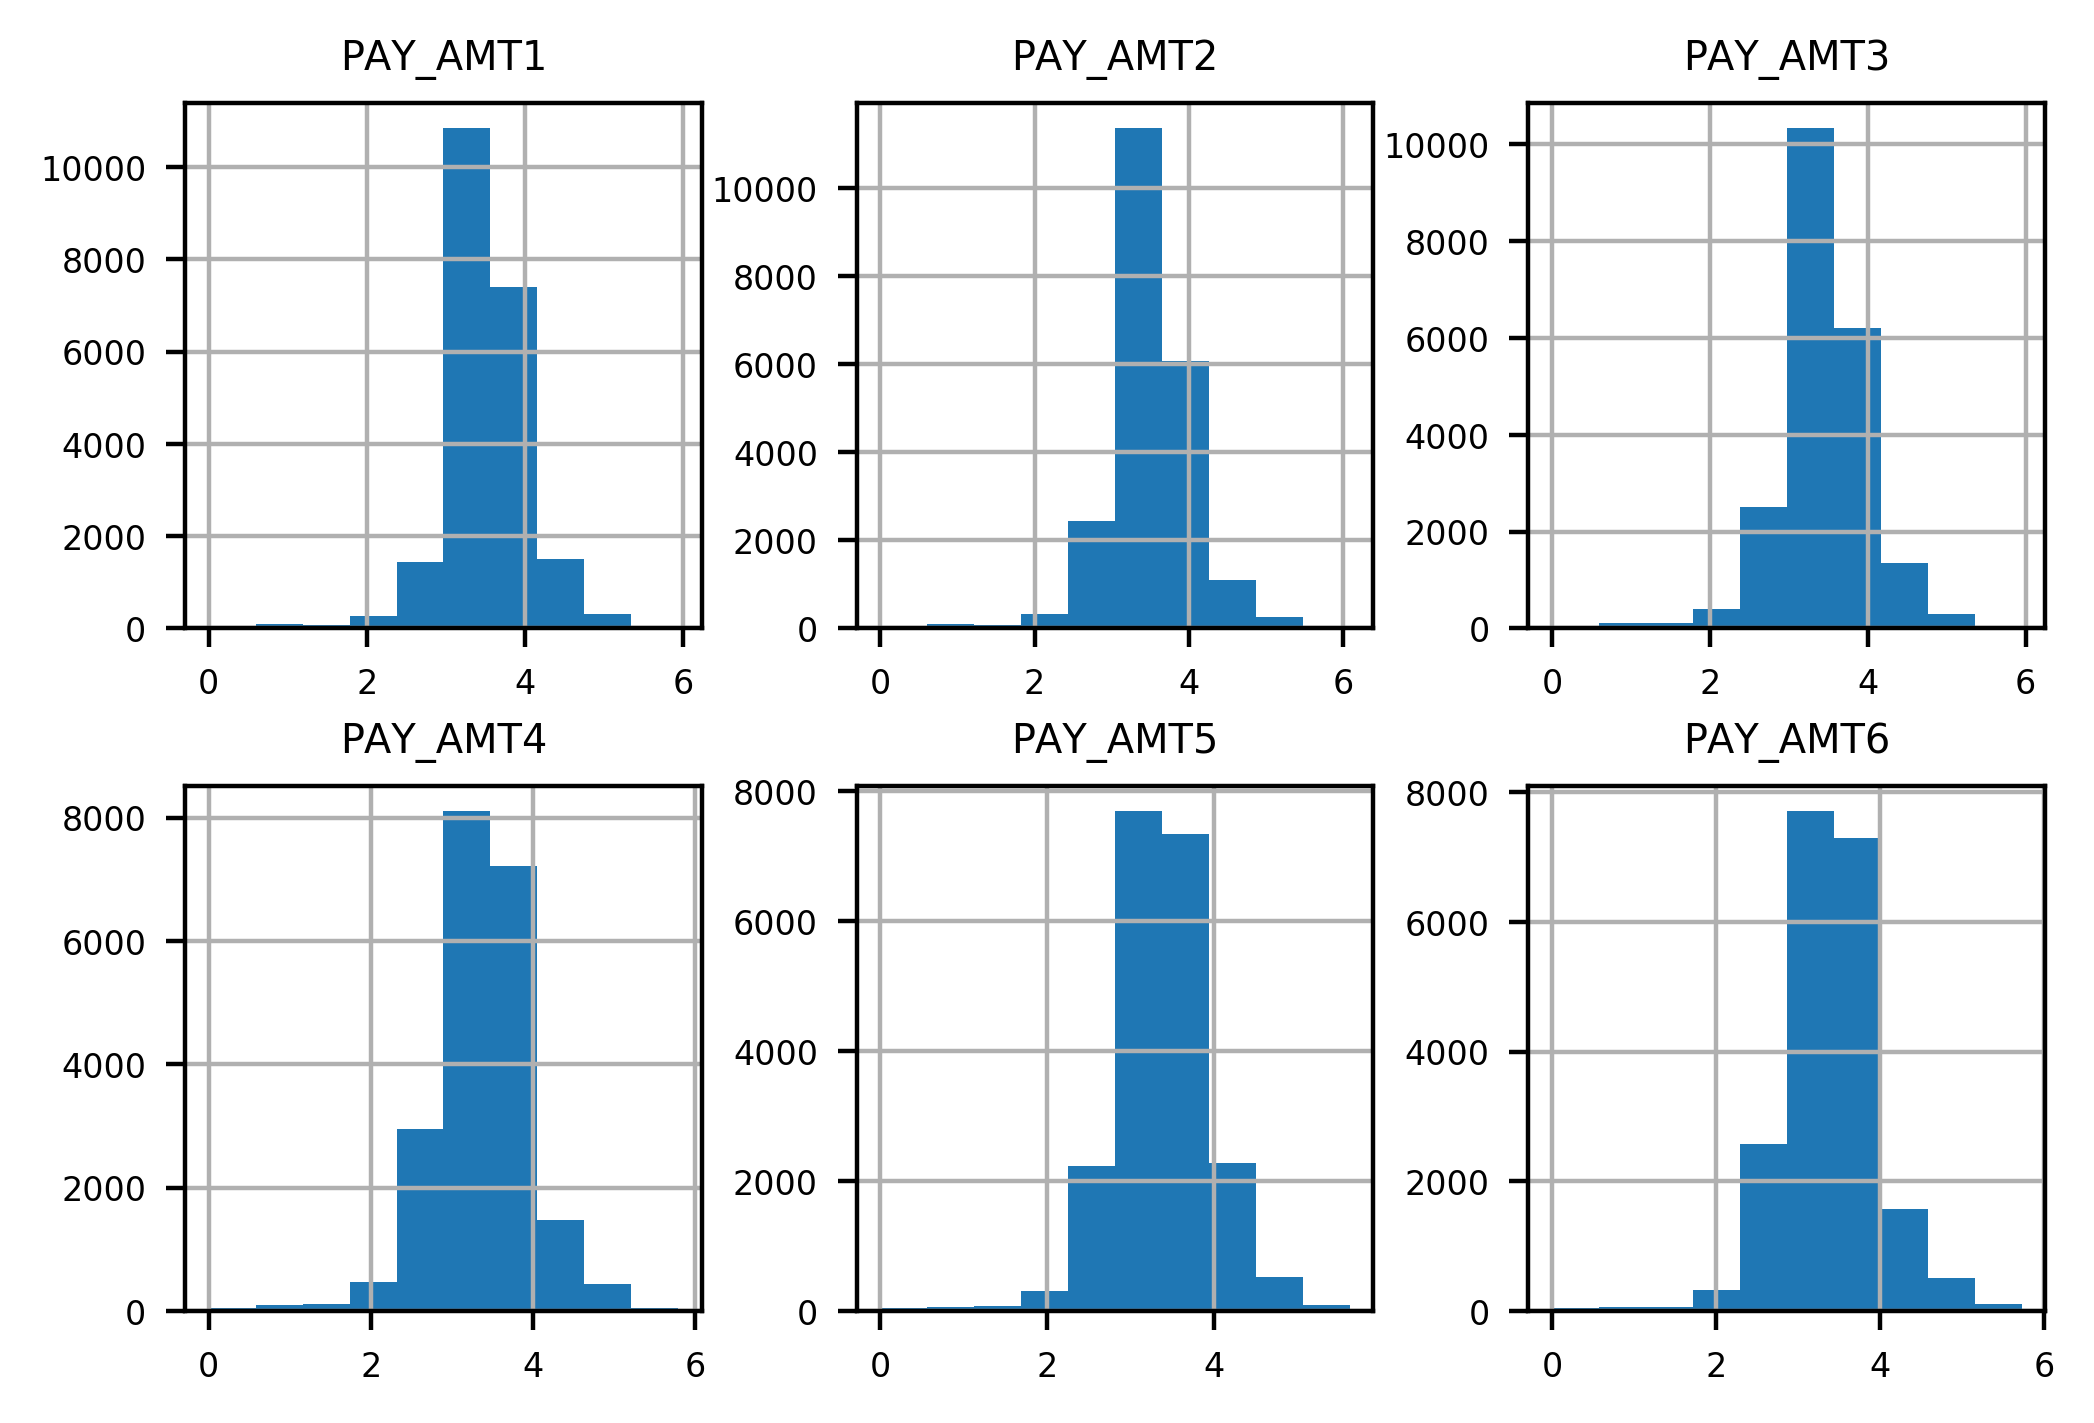

In [111]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))